## Load data from seizure

In [136]:
%load_ext autoreload
%autoreload 2
%reset -f
%matplotlib inline
# %matplotlib qt  #plot in interactive window

import pandas as pd
import re
import os
import mne

from msc.data_utils.download import download_file_scp
from msc.config import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
# get seizure index
config = get_config()
seizures_index_path = r"C:\raw_data/epilepsiae/seizures_index.csv"
df = pd.read_csv(seizures_index_path, index_col=0, parse_dates=['onset', 'offset'])

# Define Package, Patient and Seizure_num
package = "surf30"
patient = "pat_92102"
seizure_num = 3

# filter out seizure row
seizure_row = df.loc[(df["package"] == package) & (df["patient"] == patient) & (df["seizure_num"] == seizure_num)]

seizure_row

,fname,package,patient,seizure_num,classif.,onset,offset,length,pattern,vigilance,origin,semiology,t_m_240,t_m_60,t_p_60,t_p_240,onset_fpath,offset_fpath,preictal_files,preictal_range
2,surf30_pat_92102_seizures.csv,surf30,pat_92102,3,SG,2008-01-04 04:50:19,2008-01-04 04:52:44,145.0,repetitive spiking,awake,"PO2,PO4,PO8,O2,P4","oral_automatisms, manual_automatisms: bilatera...",2008-01-04 00:50:19,2008-01-04 03:50:19,2008-01-04 05:52:44,2008-01-04 08:52:44,['/media/neurohelp/DATA/datasets/epilepsiae/su...,['/media/neurohelp/DATA/datasets/epilepsiae/su...,['/media/neurohelp/DATA/datasets/epilepsiae/su...,2008-01-04T03:50:19 - 2008-01-04T04:50:19


In [138]:
# get seizure file path
remote_fpath = seizure_row["onset_fpath"].item()[3:-2]  #extract path from string
datasets_path, dataset, relative_file_path = re.split('(epilepsiae/)', remote_fpath)
local_path = download_file_scp(relative_file_path)

file exists locally at C:\raw_data/epilepsiae/surf30/pat_92102/adm_921102/rec_92101102/92101102_0020.data


In [139]:
# get seizure times
onset = seizure_row["onset"].item()
offset = seizure_row["offset"].item()

# load data
raw = mne.io.read_raw_nicolet(local_path, ch_type='eeg', preload=True)

In [140]:
raw

<RawNicolet | 92101102_0020.data, 35 x 921600 (3600.0 s), ~246.1 MB, data loaded>

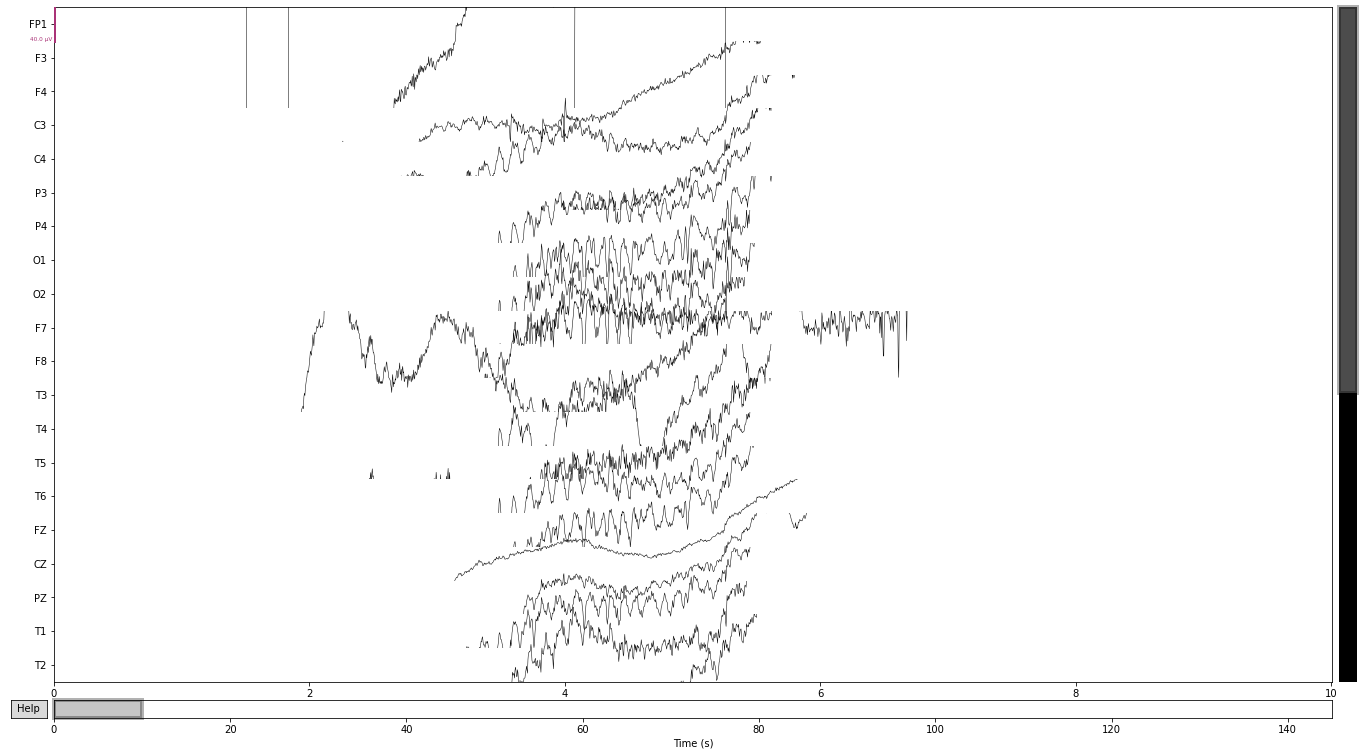

In [141]:
start_time = (onset - raw.info["meas_date"].replace(tzinfo=None)).total_seconds()
end_time = (offset - raw.info["meas_date"].replace(tzinfo=None)).total_seconds()

seizure_length = end_time - start_time
delta = 0.0
raw = raw.crop(start_time - delta * seizure_length, end_time + delta * seizure_length)

raw.plot();